In [18]:
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt





In [19]:
delta_h = 32
delta_w = 32

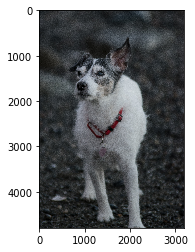

(4795, 3197, 3)


In [20]:
# Import the image
image = tf.image.decode_jpeg(tf.read_file("./images/DSC_0059.jpg"), channels=3)

session = tf.InteractiveSession()
plt.imshow(session.run(image))
plt.show()
print(session.run(image).shape)


In [23]:
img_shape = [4795, 3197]
img_h = 4795
img_w = 3197
height = tf.constant(img_h // 10)
width = tf.constant(img_w // 10)
vertical_margin = img_h // 100
horizontal_margin = img_w // 100
lim_top = img_h - img_h // vertical_margin - height  
lim_left = img_w - img_w // horizontal_margin - width
t = tf.random_uniform([], minval=vertical_margin, maxval=lim_top, dtype=tf.int32)
l = tf.random_uniform([], minval=horizontal_margin, maxval=lim_left, dtype=tf.int32)

bbox = (t, l, height, width)
print(session.run(bbox))

(889, 240, 479, 319)


In [24]:
mask = np.ones((img_h, img_w, 1), np.float32)
h = np.random.randint(delta_h//2+1)
w = np.random.randint(delta_w//2+1)
print(h)
mask[bbox[0]+h:bbox[0]+bbox[2]-h,
     bbox[1]+w:bbox[1]+bbox[3]-w, :] = 0.
print(mask)
masked = tf.multiply(image, mask)
print(masked)

3


TypeError: slice indices must be integers or None or have an __index__ method

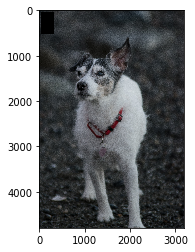

In [6]:
plt.imshow(session.run(masked))
plt.show()

Instructions for updating:
Colocations handled automatically by placer.


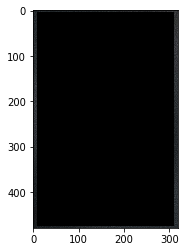

In [7]:
x = tf.image.crop_to_bounding_box(masked, bbox[0], bbox[1], bbox[2], bbox[3])

plt.imshow(session.run(x))
plt.show()

In [68]:
output_image = tf.image.encode_jpeg(masked)

# Create a constant as filename
file_name = tf.constant('Output_image.jpeg')
file = tf.write_file(file_name, output_image)

#print(session.run(file))

print("Image Saved!")

session.close()

Image Saved!
